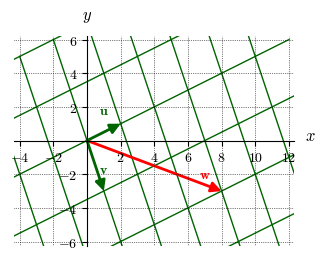

In [1]:
%display typeset
var('t')
u=vector([2,1])
v=vector([1,-3])
Fig = arrow((0,0),(2,1), color ="darkgreen", arrowsize = 3, width=2, 
            xmin = -4, xmax = 12, ymin = -6,ymax =6, gridlines = True,
          axes_labels = ['$x$','$y$'], axes_labels_size=1.2, ticks = [[-4,-2,..12],[-6,-4,..6]], figsize = 4)
Fig += arrow((0,0),(1,-3), color ="darkgreen", arrowsize = 3, width=2, tick_formatter="latex")
Fig += arrow((0,0),(8,-3), color ="red", arrowsize = 3, width=2, zorder = 0)
Fig += sum([parametric_plot(j*u+t*v, (t,-2,4), color = "darkgreen", zorder = -1) for j in range(-2,6)], )
Fig += sum([parametric_plot(j*v+t*u, (t,-3,6), color = "darkgreen", zorder = -1) for j in range(-2,6)])
Fig += text("$\\mathbf{u}$", (1,1.8), color = "darkgreen", fontsize = 10)
Fig += text("$\\mathbf{v}$", (1,-1.7), color = "darkgreen", fontsize = 10)
Fig += text("$\\mathbf{w}$", (7,-2), color = "red", fontsize = 10)
show(Fig)

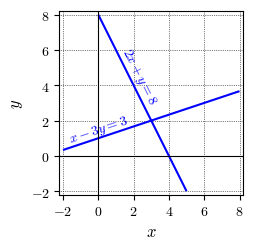

In [2]:
var('x,y')

Fig = implicit_plot( x-3*y==-3,(x,-2,8),(y,-2,8), color = "blue")
Fig += implicit_plot(2*x +y ==8,(x,-2,8),(y,-2,8), color = "blue",
                   gridlines = True, axes_labels = ['$x$','$y$'], axes = True, 
                    axes_labels_size=1.2, 
                    tick_formatter="latex", ticks = [[-2,0,..8],[-2,0,..8]], 
                    figsize = 4)
Fig += text("$x-3y=3$", (0,1.5), rotation = 18.43, color = "blue", fontsize = 10, zorder = 1)
Fig += text("$2x+ y = 8$", (2.3,4.5), rotation = -63.43, color = "blue", fontsize = 10, zorder = 1)
show(Fig)

In [3]:
(arctan(-2)*360/(2*pi)).n()

-63.4349488229220

In [4]:
var('t,s,u,v,z,y,z')
f=-x^2/5-3*y^3/8
@interact
def _(sb=selector(['Vector Field 1','Vector Field 2','Vector Field 3','Vector Field 4','Vector Field 5'],
                  label="Vector Field:")):
        plot1=plot3d(f,(x,-1,1),(y,-1,1),frame=False, opacity=.3)
        for i in range(0,5):
                plot1+=parametric_plot3d((s,-1+i/2,f(x=s,y=-1+i/2)),(s,-1,1),color="gray")
                plot1+=parametric_plot3d((-1+i/2,s,f(y=s,x=-1+i/2)),(s,-1,1),color="gray")
        if sb=='Vector Field 1':
                Fx=x
                Fy=y
                Fz=z-x
        if sb=='Vector Field 2':
                Fx=(y-z)*x
                Fy=sin(x*z)
                Fz=-abs(y)+x*z+.2
        if sb=='Vector Field 3':
                Fx=x
                Fy=y+x*z
                Fz=-y-(x*z)/2
        if sb=='Vector Field 4':
                Fx=cos(z)
                Fy=sin(x*y)
                Fz=-cos(y+x)
        if sb=='Vector Field 5':
                Fx=abs(x)-x*y
                Fy=x-y
                Fz=1.5-x*z
        for i in range(0,5):
            for j in range (0,5):
                posx=-1+i/2
                posy=-1+j/2
                posz=f(x=posx,y=posy)
                F1=Fx(x=posx,y=posy,z=posz)
                F2=Fy(x=posx,y=posy,z=posz)
                F3=Fz(x=posx,y=posy,z=posz)
                plot1+=arrow3d((posx,posy,posz),(posx+F1,posy+F2, posz+F3),color="blue")
                N=(-diff(f,x)(x=posx,y=posy)/2,-diff(f,y)(x=posx,y=posy)/2,1/2)
                Nfrac=(F1*N[0]+F2*N[1]+F3*N[2])/(N[0]^2+N[1]^2+N[2]^2)
                FNx=Nfrac*N[0]
                FNy=Nfrac*N[1]
                FNz=Nfrac*N[2]
                plot1+=arrow3d((posx,posy,posz),(posx+FNx,posy+FNy,posz+FNz),color="green")
                plot1+=arrow3d((posx+FNx,posy+FNy,posz+FNz),(posx+F1,posy+F2,posz+F3),color="purple")
                plot1+=arrow3d((.25,.25,-.2),(.3,.2,.3),color="yellow")
        show(plot1)

Interactive function <function _ at 0x7f5e1158e940> with 1 widget
  sb: Dropdown(description='Vector Field:', …

In [1]:
var('t,s')
u = vector([1,1,0])
v = vector([0,1,0])
w = vector([0,1/2,1])
y = vector([1,0,1])
p0 =vector([0,0,1])
@interact
def _(sb=selector(['1','2','3','4'], label="Exemple :")):
    Plan1 = parametric_plot3d( s*u + t*v, (s,-2,2), (t,-2,2), color = "orange", mesh = "true")
    Plan2 = parametric_plot3d( s*u + t*w, (s,-2,2), (t,-2,2), color = "green", mesh = "true")
    Plan3 = parametric_plot3d( s*v + t*w, (s,-2,2), (t,-2,2), color = "red", mesh = "true")
    Plan4 = parametric_plot3d( w + s*u + t*v, (s,-2,2), (t,-2,2), color = "brown", mesh = "true")
    Plan5 = parametric_plot3d( s*u + t*y, (s,-2,2), (t,-2,2), color = "blue", mesh = "true")
    Plan6 = parametric_plot3d( w + s*u + t*y, (s,-2,2), (t,-2,2), color = "magenta", mesh = "true")
    if sb=='1':
        Fig = Plan1 + Plan2 + Plan3
    if sb=='2':
        Fig = Plan1 + Plan3 + Plan4
    if sb=='3':
        Fig = Plan1 + Plan2 + Plan5
    if sb=='4':
        Fig = Plan1 + Plan2 + Plan6
    show(Fig)

Interactive function <function _ at 0x7f15f07db4c0> with 1 widget
  sb: Dropdown(description='Exemple :', opti…

In [56]:
var('t,s')
u = vector([1,1,0])
v = vector([0,1,0])
w = vector([0,1/2,1])
y = vector([1,0,1])
p0 =vector([0,0,1])

Plan1 = parametric_plot3d( s*u + t*v, (s,-2,2), (t,-2,2), color = "orange", mesh = "true")
Plan2 = parametric_plot3d( s*u + t*w, (s,-2,2), (t,-2,2), color = "green", mesh = "true")
Plan3 = parametric_plot3d( s*v + t*w, (s,-2,2), (t,-2,2), color = "red", mesh = "true")
Plan4 = parametric_plot3d( w + s*u + t*v, (s,-2,2), (t,-2,2), color = "brown", mesh = "true")
Plan5 = parametric_plot3d( s*u + t*y, (s,-2,2), (t,-2,2), color = "blue", mesh = "true")
Plan6 = parametric_plot3d( w + s*u + t*y, (s,-2,2), (t,-2,2), color = "magenta", mesh = "true")
Fig1 = Plan1 + Plan2 + Plan3
Fig2 = Plan1 + Plan3 + Plan4
Fig3 = Plan1 + Plan2 + Plan5
Fig4 = Plan1 + Plan2 + Plan6
show(Plan1 + Plan2+Plan5 + Plan6)

Graphics3d Object

In [50]:
#Fig = implicit_plot3d(x+y+z ==0 , (x,-4,4),(y,-4,4), (z,-4,4), opacit 0.05)
Fig = plot3d(-x+-y , (x,-2,2),(y,-2,2), color = "orange", opacity = 1, mesh = False)
Fig += plot3d(-x+y , (x,-2,2),(y,-2,2), color = "darkgreen", opacity =1, mesh = False)
Fig += plot3d(x+y , (x,-2,2),(y,-2,2), color = "blue", opacity =1,  mesh = False)
show(Fig)

Graphics3d Object